In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
%matplotlib inline

In [3]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def dist(self, other):
        return np.sqrt(np.power(self.x - other.x, 2) + np.power(self.y - other.y, 2))
    
    def __eq__(self, other):
        return self.x == other.x and self.y == other.y
    
    def __repr__(self):
        return f"Point({self.x}, {self.y})"
    
    def to_array(self):
        return np.array([self.x, self.y])
    
    @staticmethod
    def from_array(arr):
        return Point(arr[0], arr[1])

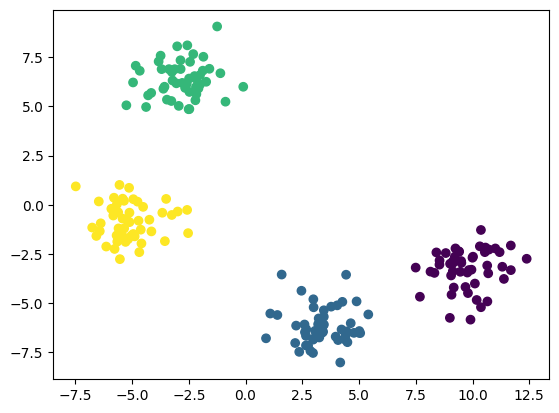

In [31]:
X, labels = make_blobs(n_samples=200, n_features=2, centers=4, random_state=56)

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.show()

## Algorithm

In [32]:
data = np.array([Point(x, y) for x, y in zip(X[:, 0], X[:, 1])])

In [33]:
# np.random.seed(69)

k = 2

# initial points
centroids = np.random.choice(data, k)
centroids = np.array([i.to_array() for i in centroids])
centroids

array([[-5.61054636, -0.38530281],
       [-2.66174866,  5.94330535]])

In [34]:
prev_centroids = centroids

result = []
means = []

while True:
    means.append([Point.from_array(i) for i in prev_centroids])
    
    clusters = {} 
    
    # creating the clusters
    for i in data:
        prep = np.array([Point.from_array(x) for x in prev_centroids])
        d = [i.dist(j) for j in prep]
        clusters.setdefault(d.index(min(d)), []).append(i)
    
        
    # new centroids
    new_centroids = [0] * k
    
    # calculating the new centroids
    for key, value in clusters.items():
        m_x = np.average([i.x for i in value])
        m_y = np.average([i.y for i in value])
        
        new_centroids[key] = Point(m_x, m_y)
    
    new_centroids = np.array([i.to_array() for i in new_centroids])
    
    # check if the centroids have converged
    if np.allclose(prev_centroids, new_centroids):
        break
        
    prev_centroids = new_centroids
    
    result.append(clusters)

## Last Result

In [19]:
from itertools import chain

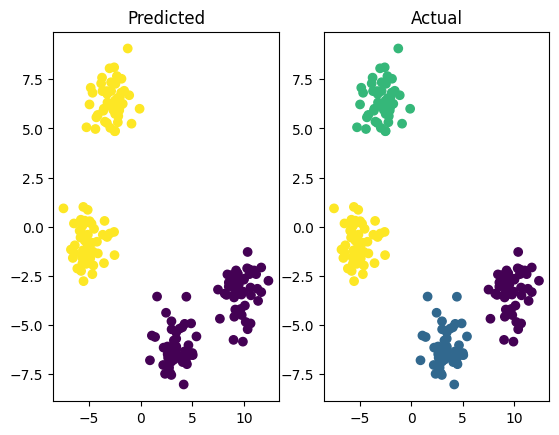

In [35]:
labls = []

for key, val in result[-1].items():
    for _ in val:
        labls.append(key)
        

plt.subplot(1, 2, 1)
plt.scatter(
    [i.x for i in chain(*result[-1].values())],
    [i.y for i in chain(*result[-1].values())],
    c=labls
)
plt.title("Predicted")

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("Actual")

plt.show()

In [36]:
len(result)

5

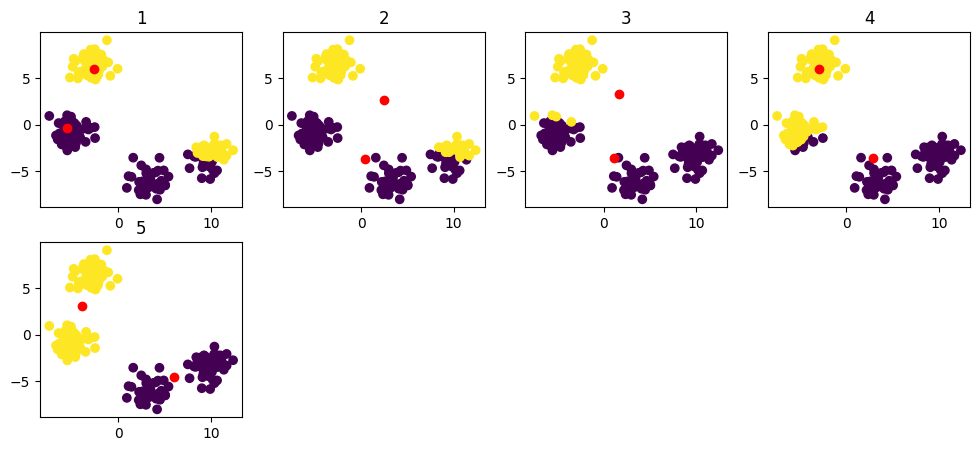

In [37]:
plt.figure(figsize=(12, len(result)))

m_x = [[m_.x for m_ in m] for m in means]
m_y = [[m_.y for m_ in m] for m in means]

for j, i in enumerate(result):
    
    labls = []
    xs = []
    ys = []

    for key, val in i.items():
        for v in val:
            xs.append(v.x)
            ys.append(v.y)
            labls.append(key)

            
    plt.subplot(len(result) // 4 + 1, 4, j + 1)
    plt.scatter(xs, ys, c=labls)
    plt.title(f"{j + 1}")
    plt.scatter(m_x[j], m_y[j], c='red')

plt.show()

False